In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interpolate

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
api_casing_bit_size_programme= {'Casing OD': [4.5, 5, 5.5, 6.625, 7, 7.625, 8.625, 9.625, 10.75, 11.75, 13.375, 16, 18.625, 20, 24],
                                'Coupling OD': [5.000, 5.563, 6.050, 7.380, 7.656, 8.500, 9.625, 10.625, 11.750, 12.750, 14.375, 17.000, 19.500, 21.000, 25.500],
                                'Drift': [3.701, 4.283, 4.545, 5.550, 5.785, 6.500, 7.386, 8.379, 9.404, 10.616, 12.791, 14.822, 16.000, 18.936, 21.250],
                                'Min Clearance': [1.000, 1.250, 1.250, 1.750, 2.000, 2.500, 3.000, 3.250, 3.250,3.500,3.500,3.500,3.500,3.500,3.500],
                                'Min. Hole Size': [6.000, 6.833, 7.300, 9.140, 9.656, 11.000, 12.625, 13.875, 15.000, 17.875, 17.875, 20.500, 23.000, 24.500, 29.000],
                                'Min. Bit Size': [6, 7, 7.375, 9.5, 9.75, 11, 12.75, 14.75, 15, 18, 18, 20.75, 23, 25.5, 29]}

df= pd.DataFrame(api_casing_bit_size_programme)
df

,Casing OD,Coupling OD,Drift,Min Clearance,Min. Hole Size,Min. Bit Size
0,4.500,5.000,3.701,1.00,6.000,6.000
1,5.000,5.563,4.283,1.25,6.833,7.000
2,5.500,6.050,4.545,1.25,7.300,7.375
3,6.625,7.380,5.550,1.75,9.140,9.500
4,7.000,7.656,5.785,2.00,9.656,9.750
5,7.625,8.500,6.500,2.50,11.000,11.000
6,8.625,9.625,7.386,3.00,12.625,12.750
7,9.625,10.625,8.379,3.25,13.875,14.750
8,10.750,11.750,9.404,3.25,15.000,15.000
9,11.750,12.750,10.616,3.50,17.875,18.000


In [ ]:
df.index= [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df

,Casing OD,Coupling OD,Drift,Min Clearance,Min. Hole Size,Min. Bit Size
1,4.500,5.000,3.701,1.00,6.000,6.000
2,5.000,5.563,4.283,1.25,6.833,7.000
3,5.500,6.050,4.545,1.25,7.300,7.375
4,6.625,7.380,5.550,1.75,9.140,9.500
5,7.000,7.656,5.785,2.00,9.656,9.750
6,7.625,8.500,6.500,2.50,11.000,11.000
7,8.625,9.625,7.386,3.00,12.625,12.750
8,9.625,10.625,8.379,3.25,13.875,14.750
9,10.750,11.750,9.404,3.25,15.000,15.000
10,11.750,12.750,10.616,3.50,17.875,18.000


In [ ]:
#getting casing configuration
def determine_bit_size(casing_od_value):
  global df
  min_bit_size= df.loc[df['Casing OD']==casing_od_value, 'Min. Bit Size'].values[0]
  return min_bit_size

def determine_next_casing_od_value(casing_od_value):
  global df
  df['Drift Diff']=df['Drift']-determine_bit_size(casing_od_value)
  positive_difference= df[df['Drift Diff']>0]
  if not positive_difference.empty:
    nearest_casing_od_row= positive_difference.loc[positive_difference['Drift Diff'].idxmin()]
    nearest_casing_od= nearest_casing_od_row['Casing OD']
    nearest_drift=  nearest_casing_od_row['Drift']
  else:
    nearest_casing_od= None
    nearest_drift= None
  return nearest_casing_od
  df= df.drop('Drift Diff', axis=1)

production_casing_od_value= 5.500
a= determine_bit_size(production_casing_od_value)
intermediate_casing_od_value= determine_next_casing_od_value(production_casing_od_value)
b= determine_bit_size(intermediate_casing_od_value)
surface_casing_od_value= determine_next_casing_od_value(intermediate_casing_od_value)
c= determine_bit_size(surface_casing_od_value)
conductor_casing_od_value= determine_next_casing_od_value(surface_casing_od_value)
d= determine_bit_size(conductor_casing_od_value)

dict1= {'Name of Casing': ['Conductor Casing', 'Surface Casing', 'Intermediate Casing', 'Production Casing'],
        'Casing Size(inch)': [conductor_casing_od_value, surface_casing_od_value,intermediate_casing_od_value,production_casing_od_value,],
        'Bit Size(inch)': [d, c, b, a]}
dt= pd.DataFrame(dict1)
dt.index=dt.index+1
casing_program = dt
casing_program

,Name of Casing,Casing Size(inch),Bit Size(inch)
1,Conductor Casing,20.000,25.500
2,Surface Casing,13.375,18.000
3,Intermediate Casing,8.625,12.750
4,Production Casing,5.500,7.375


In [ ]:
# Depth(ft) array
depth_array = np.arange(0, 19000, 1000)

# EMW (Pf) array
emw_pf_array = np.concatenate((np.full(11, 9.0), np.array([ 9.0, 11.3, 14.3, 15.7, 16.0, 16.7, 17.0, 17.2])))

# EMW P(frac) array
emw_pfrac_array = np.array([11.7, 12.20, 13.20, 13.82, 14.15, 14.70, 15.15, 15.55, 15.90, 16.2, 16.50, 16.80, 17.30, 18.00, 18.30, 18.50, 18.70, 18.90, 19.00])

# Interpolation
from scipy.interpolate import splrep, splev
emw_pf_predictator = splrep(depth_array, emw_pf_array, k=3, s=0.0)
emw_pf_predicted = splev(depth_array, emw_pf_predictator )
emw_pfrac_predictator = splrep(emw_pfrac_array, depth_array, k=3, s=4)
fracture_depth_predicted = splev(emw_pfrac_array, emw_pfrac_predictator)

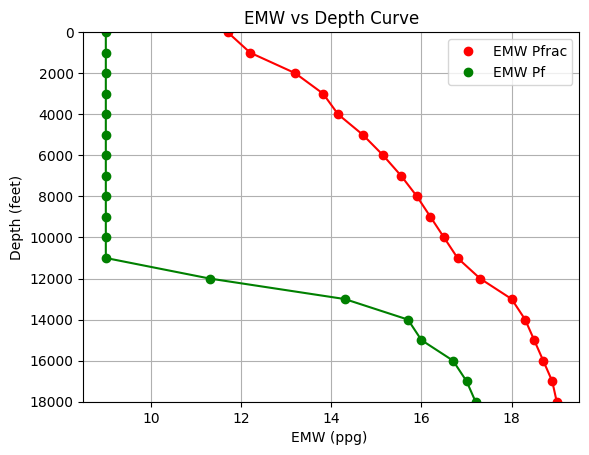

In [ ]:
# Create the inverted plot
plt.plot(emw_pfrac_array, depth_array, 'o', label='EMW Pfrac', color='red')
plt.plot(emw_pf_array, depth_array, 'o', label='EMW Pf',color='green')
plt.plot(emw_pfrac_array, fracture_depth_predicted, '-', color='red')
plt.plot(emw_pf_predicted, depth_array, '-',color='green')


# Set the y-axis limits to start at the bottom of the well till top (inverted)
plt.ylim(depth_array[len(depth_array)-1], 0)
# Customize labels and title
plt.xlabel('EMW (ppg) ')
plt.ylabel('Depth (feet)')
plt.title('EMW vs Depth Curve')

# Add a horizontal line at y=0 for better visualization of mirrored effect (optional)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)

# Adjust legend placement (optional)
plt.legend(loc='upper right')

# Display the plot
plt.grid(True)
plt.show()

In [ ]:
def casing_setting_depth(emw_pf_array, emw_pfrac_array, depth_array):
  setting_depth = np.array(depth_array[len(depth_array)-1]+100)
  least_emw_pfrac = emw_pfrac_array[0]
  emw = np.array([splev(depth_array[len(depth_array)-1], emw_pf_predictator ) + 0.8])
  emw1 = emw
  while emw > least_emw_pfrac:
    d = splev(emw, emw_pfrac_predictator) + 100
    setting_depth = np.append(setting_depth, d)
    emw = splev(d, emw_pf_predictator ) + 0.8
    emw1 = np.append(emw1, emw)
  return setting_depth,emw1

In [ ]:
setting_depth , emw = casing_setting_depth(emw_pf_array, emw_pfrac_array, depth_array)
setting_depth_rounded = np.ceil(setting_depth/10)*10
emw_rounded = np.ceil(emw*10)/10
setting_depth_rounded = np.flip(setting_depth_rounded)
emw_rounded = np.flip(emw_rounded)

In [ ]:
empty = np.empty(1)
empty[0] = np.nan
empty1 = np.empty(1)
empty1[0] = emw_rounded[0]
dict2 = {'Depth(ft)': np.concatenate((empty, setting_depth_rounded)),
         'Mud Weight(ppg)': np.concatenate((empty1, emw_rounded))}
dt1 = pd.DataFrame(dict2)
dt1.index = dt1.index + 1
# Create a new DataFrame by concatenating casing_program and dt1
casing_program_final = pd.concat([casing_program, dt1], axis=1)
casing_program_final.reset_index(drop=True, inplace=True)
casing_program_final = casing_program_final.fillna('As per requirement')
casing_program_final

,Name of Casing,Casing Size(inch),Bit Size(inch),Depth(ft),Mud Weight(ppg)
0,Conductor Casing,20.000,25.500,As per requirement,9.8
1,Surface Casing,13.375,18.000,6530.0,9.8
2,Intermediate Casing,8.625,12.750,13100.0,15.4
3,Production Casing,5.500,7.375,18100.0,18.0


In [ ]:
file_path='/table_google_colab.xlsx'
da = pd.read_excel(file_path, sheet_name='5.5')
da

,nominal weight,grade,L/S/B,Fj (1000 lbs),Pb(psi),Pc(psi),K(1000lbs)
0,23.0,N-80,L,502,10560,11160,530
1,26.8,C-90,S,507,14320,14880,707
2,26.8,C-90,L,630,14320,14880,707
3,23.0,P-110,L,643,14530,14540,729
4,29.7,C-90,L,704,16090,16510,785
5,26.0,P-110,L,748,16660,17400,826
6,32.6,C-90,L,777,17900,18130,861
7,23.0,V-150,L,823,19810,18390,995
8,35.3,C-90,L,847,19670,19680,935
9,38.0,C-90,L,916,21480,21200,1007


In [ ]:
file_path='/table_google_colab.xlsx'
db = pd.read_excel(file_path, sheet_name='8.625')
db

,nominal weight,grade,L/S/B,Fj (1000 lbs),Pb(psi),Pc(psi),K(1000lbs)
0,28,H-40,S,233,2470,1160,318
1,24,J-55,S,241,2950,1370,381
2,32,H-40,S,279,2860,2200,366
3,32,J-55,S,372,3930,2530,503
4,32,J-55,L,417,3930,2530,503
5,36,J-55,S,434,4460,3450,568
6,36,J-55,L,486,4460,3450,568
7,36,N-80,L,688,6490,4100,827
8,40,N-80,L,788,7300,5520,925
9,40,C-90,L,858,8220,5870,1040


In [ ]:
file_path='/table_google_colab.xlsx'
dc = pd.read_excel(file_path, sheet_name='13.375')
dc

,nominal weight,grade,L/S/B,Fj (1000 lbs),Pb(psi),Pc(psi),K(1000lbs)
0,48.0,H-40,S,322,1730,740,541
1,54.5,J-55,S,514,2730,1130,853
2,61.0,J-55,S,595,3090,1540,962
3,68.0,J-55,S,675,3450,1950,1069
4,68.0,N-80,S,963,5020,2260,1556
5,68.0,C-90,S,1057,5650,2320,1750
6,68.0,P-110,S,1297,6910,2340,2139
7,72.0,P-110,S,1402,7400,2890,2284
8,80.7,P-110,L,2493,8350,4000,2565
9,86.0,P-110,L,2677,8980,4780,2754


In [ ]:
def find_matching_row(filtered_df, next_casing_row):
    # Check if the 'L/S/B' entry in next_casing_row is 'S'
    if next_casing_row['L/S/B'].iloc[0] == 'S': # Access the first element of the series using iloc[0]
        # Find the row in filtered_df where 'L/S/B' is 'L' and 'nominal weight' and 'grade' match
        matching_row = filtered_df[
            (filtered_df['L/S/B'] == 'L') &
            (filtered_df['nominal weight'] == next_casing_row['nominal weight'].iloc[0]) & # Access the first element of the series using iloc[0]
            (filtered_df['grade'] == next_casing_row['grade'].iloc[0]) # Access the first element of the series using iloc[0]
        ]
        # Check if any matching row is found
        if not matching_row.empty:
            return matching_row
    return None

In [ ]:
def lower_multiple_of_5(number):
    return (number // 5) * 5

def next_multiple_of_5(number):
    return ((number // 5) + 1) * 5

In [ ]:
def casing_design(df, Pf, row, d):
    Nc = 1.125
    Nj = 2
    Na = 1.75
    Ni = 1
    df = df.sort_values(by='Fj (1000 lbs)', ascending=True)

    # Filter rows where Pb(psi) is greater than Pf
    filtered_df =df[df['Pb(psi)'] > Pf*Ni]
    filtered_df = filtered_df.reset_index(drop=True)
    P_gr = 0.052*row
    B = (65.4 - row) / 65.4
    W = 0

    Ph = P_gr*d
    df_1 = filtered_df[filtered_df['Pc(psi)'] > Ph*Nc]

    # Assuming df_1 is your DataFrame and you want to extract values from the first row
    first_row = df_1.iloc[0]

    # Extracting values into variables
    w_1 = first_row['nominal weight']
    grade = first_row['grade']
    L_S_B = first_row['L/S/B']
    Fj_1 = first_row['Fj (1000 lbs)']*1000
    Pb = first_row['Pb(psi)']
    Pc = first_row['Pc(psi)']
    K = first_row['K(1000lbs)']*10**3
    LS_1 = d

    # Create an empty DataFrame with the specified columns
    columns = ['w', 'grade', 'L/S/B', 'Fj', 'Pb', 'Pc', 'K', 'LS', 'W', 'Design Criteria']
    casing_design_table = pd.DataFrame(columns=columns)
    # Create a dictionary with the extracted values
    new_row = {
      'w': w_1,
      'grade': grade,
      'L/S/B': L_S_B,
      'Fj': Fj_1,
      'Pb': Pb,
      'Pc': Pc,
      'K': K,
      'LS': LS_1,
      'W' : W,
      'Design Criteria': 'Collapse'
          }
    # Assuming casing_design_table is your DataFrame and new_row is the new data to be added
    new_row_df = pd.DataFrame([new_row])

    # Filter out empty or all-NA columns from new_row_df
    new_row_df = new_row_df.dropna(axis=1, how='all')
    # Assuming casing_design_table is your DataFrame and new_row is the new data to be added
    casing_design_table = pd.concat([casing_design_table, new_row_df], ignore_index=True)

    # Just to start loop
    LS_2 = next_multiple_of_5(LS_1)
    LM_2 = LS_2 +10
    top = d
    first_row = pd.DataFrame([first_row])
    while top >= 20:
      if LM_2>LS_2:
        w_1 = first_row['nominal weight'].iloc[0]
        LS_1 = LS_2

        # Get the index of the first row in df_1 within filtered_df
        first_row_index = filtered_df[filtered_df.eq(first_row.iloc[0]).all(axis=1)].index

        # Next Row
        next_casing_row_index = first_row_index - 1

        # Select the row just above the first row of df_1
        next_casing_row = filtered_df.iloc[next_casing_row_index]

        # Extracting values into variables
        w_2 = next_casing_row['nominal weight'].iloc[0]
        grade = next_casing_row['grade'].iloc[0]
        L_S_B = next_casing_row['L/S/B'].iloc[0]
        Fj_2 = next_casing_row['Fj (1000 lbs)'].iloc[0] * 1000
        Pb = next_casing_row['Pb(psi)'].iloc[0]
        Pc = next_casing_row['Pc(psi)'].iloc[0]
        K = next_casing_row['K(1000lbs)'].iloc[0] * 10**3

        # Calculating Setting depth
        LS_2 = Pc/(P_gr*Nc)
        Pcc = Pc
        LS_22 = LS_2
        while True:
            LS_2 = LS_22
            t = w_1*B*(LS_1 - LS_2)
            Pcc = (Pc/K)*( ((K**2) - 3*(W+t)**2)**(0.5) - (W+t))
            LS_22 = Pcc/(P_gr*Nc)
            if abs(LS_2 - LS_22) <= 5:
                break
        LS_2 =next_multiple_of_5(LS_22)
        t = w_1*B*(LS_1 - LS_2)
        W += t
        LM_2 = ((Fj_2 / Nj) - W) / (w_2*B)

        # Checking for Long Thread Pipe
        if LM_2 <= LS_2:
          temp = find_matching_row(filtered_df, next_casing_row)
          if temp == None:
             next_casing_row = next_casing_row
             LS_2 = lower_multiple_of_5(LS_22)
          else:
            # Extracting values into variables
            w_L = temp['nominal weight'].iloc[0]
            Fj_L = temp['Fj (1000 lbs)'].iloc[0]*1000
            Pc_L = temp['Pc(psi)'].iloc[0]
            K_L = temp['K(1000lbs)'].iloc[0]*10**3

            # Calculating Setting depth
            W_L = W -t
            LS_L = Pc_L/(P_gr*Nc)
            Pcc = Pc_L
            LS_22_L = LS_L
            while True:
                LS_L = LS_22_L
                t_L += w_1*B*(LS_1 - LS_L)
                Pcc = (Pc_L/K_L)*( ((K_L**2) - 3*(W_L + t_L)**2)**(0.5) - (W_L + t_L))
                LS_22_L = Pcc/(P_gr*Nc)
                if (LS_22_L - LS_L) <= 5:
                      break
            LS_L = next_multiple_of_5(LS_22_L)
            t_L += w_1*B*(LS_1 - LS_L)
            W_L += t_L
            LM_L = ((Fj_L / Nj) - W_L) / (w_L*B)
            if LM_L > LS_L:
              next_casing_row = temp
              # Extracting values into variables
              w_2 = next_casing_row['nominal weight'].iloc[0]
              grade = next_casing_row['grade'].iloc[0]
              L_S_B = next_casing_row['L/S/B'].iloc[0]
              Fj_2 = next_casing_row['Fj (1000 lbs)'].iloc[0] * 1000
              Pb = next_casing_row['Pb(psi)'].iloc[0]
              Pc = next_casing_row['Pc(psi)'].iloc[0]
              K = next_casing_row['K(1000lbs)'].iloc[0] * 10**3
              LS_2 = LS_L
              LM_2 = LM_L
              W = W_L
            else:
                next_casing_row = next_casing_row
                LS_2 = lower_multiple_of_5(LS_22)
       # Create a dictionary with the extracted values
        new_row = {
         'w': w_2,
         'grade': grade,
         'L/S/B': L_S_B,
         'Fj': Fj_2,
         'Pb': Pb,
         'Pc': Pc,
         'K': K,
         'LS': LS_2,
         'W' : W,
         'Design Criteria': 'Collapse'
                 }
        # Assuming casing_design_table is your DataFrame and new_row is the new data to be added
        new_row_df = pd.DataFrame([new_row])

        # Filter out empty or all-NA columns from new_row_df
        new_row_df = new_row_df.dropna(axis=1, how='all')
        # Assuming casing_design_table is your DataFrame and new_row is the new data to be added
        casing_design_table = pd.concat([casing_design_table, new_row_df], ignore_index=True)
        first_row = next_casing_row
        top = LS_2

      else:
        LS_3 = lower_multiple_of_5(LS_2 - LM_2)
        top = LS_3
        w_1 = first_row['nominal weight'].iloc[0]
        # Get the index of the first row in df_1 within filtered_df
        first_row_index = filtered_df[filtered_df.eq(first_row.iloc[0]).all(axis=1)].index

        next_casing_row_index = first_row_index + 1

        # Select the row just above the first row of df_1
        next_casing_row = filtered_df.iloc[next_casing_row_index]

         # Extracting values into variables
        w_2 = next_casing_row['nominal weight'].iloc[0]
        grade = next_casing_row['grade'].iloc[0]
        L_S_B = next_casing_row['L/S/B'].iloc[0]
        Fj_2 = next_casing_row['Fj (1000 lbs)'].iloc[0] * 1000
        Pb = next_casing_row['Pb(psi)'].iloc[0]
        Pc = next_casing_row['Pc(psi)'].iloc[0]
        K = next_casing_row['K(1000lbs)'].iloc[0] * 10**3

        W += w_1*B*(LS_2-LS_3)
        LM_2 = ((Fj_2 / Nj) - W) / (w_2*B)
        LS_2 = LS_3
        if LM_2+20 >= top:
            top = 0
        # Create a dictionary with the extracted values
        new_row = {
         'w': w_2,
         'grade': grade,
         'L/S/B': L_S_B,
         'Fj': Fj_2,
         'Pb': Pb,
         'Pc': Pc,
         'K': K,
         'LS': LS_3,
         'W' : W,
         'Design Criteria': 'Tension'
                 }
         # Assuming casing_design_table is your DataFrame and new_row is the new data to be added
        new_row_df = pd.DataFrame([new_row])

         # Filter out empty or all-NA columns from new_row_df
        new_row_df = new_row_df.dropna(axis=1, how='all')
         # Assuming casing_design_table is your DataFrame and new_row is the new data to be added
        casing_design_table = pd.concat([casing_design_table, new_row_df], ignore_index=True)
        first_row = next_casing_row

    return casing_design_table


In [ ]:
production_casing_row = casing_program_final[casing_program_final['Name of Casing'] == 'Production Casing']
if not production_casing_row.empty:
    production_casing_depth = production_casing_row['Depth(ft)'].values[0]
    production_casing_mud_weight_used = production_casing_row['Mud Weight(ppg)'].values[0]
    mud_pro= production_casing_mud_weight_used - 0.8
    pro_pf= 0.052*production_casing_depth*mud_pro
    print("Production Casing Design")
    x= casing_design(da, pro_pf, production_casing_mud_weight_used, production_casing_depth)
    print(x)
else:
    print("No 'Production casing' found in casing_program_final")

Production Casing Design
      w  grade L/S/B      Fj     Pb     Pc       K       LS              W  \
0  35.3   C-90     L  847000  19670  19680  935000  18100.0              0   
1  23.0  V-150     L  823000  19810  18390  995000  16905.0   30701.284404   
2  32.6   C-90     L  777000  17900  18130  861000  16370.0   39536.238532   
3  23.0  V-150     L  823000  19810  18390  995000   1600.0  388514.752294   
4  35.3   C-90     L  847000  19670  19680  935000    220.0  411518.972477   

  Design Criteria  
0        Collapse  
1        Collapse  
2        Collapse  
3         Tension  
4         Tension  


<ipython-input-91-3d03730c8315>:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  casing_design_table = pd.concat([casing_design_table, new_row_df], ignore_index=True)


In [ ]:
intermediate_casing_row = casing_program_final[casing_program_final['Name of Casing'] == 'Intermediate Casing']
if not intermediate_casing_row.empty:
    intermediate_casing_depth = intermediate_casing_row['Depth(ft)'].values[0]
    intermediate_casing_mud_weight_used = intermediate_casing_row['Mud Weight(ppg)'].values[0]
    mud_inter = intermediate_casing_mud_weight_used - 0.8
    inter_pf = 0.052 * intermediate_casing_depth * mud_inter
    print("Intermediate Casing Design")
    y= casing_design(db, inter_pf, intermediate_casing_mud_weight_used, intermediate_casing_depth)
    print(y)
else:
    print("No 'Intermediate casing' found in casing_program_final")


Intermediate Casing Design
    w    grade L/S/B       Fj     Pb     Pc        K       LS              W  \
0  49    V-150     L  1789000  16950  12950  2118000  13100.0              0   
1  49    Q-125     L  1496000  14130  11650  1765000  12870.0     8803.51682   
2  49     S-95     L  1159000  10740  10400  1341000  10690.0   90470.183486   
3  49     C-90     L  1085000  10170   9340  1271000   8805.0  161085.626911   
4  40  HCP-110     L  1055000  10040   7900  1271000   6585.0  244250.764526   
5  40    B-123     L   890000   9990   6000  1156000   3945.0  324831.804281   
6  40  HCP-110     L  1055000  10040   7900  1271000     15.0   445015.29052   

  Design Criteria  
0        Collapse  
1        Collapse  
2        Collapse  
3        Collapse  
4        Collapse  
5        Collapse  
6         Tension  


<ipython-input-91-3d03730c8315>:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  casing_design_table = pd.concat([casing_design_table, new_row_df], ignore_index=True)


In [ ]:
surface_casing_row = casing_program_final[casing_program_final['Name of Casing'] == 'Surface Casing']
if not surface_casing_row.empty:
    surface_casing_depth = surface_casing_row['Depth(ft)'].values[0]
    surface_casing_mud_weight_used = surface_casing_row['Mud Weight(ppg)'].values[0]
    mud_sur= surface_casing_mud_weight_used - 0.8
    sur_pf= 0.052*surface_casing_depth*mud_sur
    print("Surface Casing Design")
    z= casing_design(dc, sur_pf, surface_casing_mud_weight_used, surface_casing_depth)
    print(z)
else:
    print("No 'Surface casing' found in casing_program_final")

Surface Casing Design
      w  grade L/S/B       Fj    Pb    Pc        K      LS              W  \
0  80.7  P-110     L  2493000  8350  4000  2565000  6530.0              0   
1  72.0  P-110     S  1402000  7400  2890  2284000  4750.0  122464.100917   
2  68.0  P-110     S  1297000  6910  2340  2139000  3675.0   188265.93578   
3  68.0   C-90     S  1057000  5650  2320  1750000  3515.0  197515.599388   
4  68.0   N-80     S   963000  5020  2260  1556000  3305.0  209655.782875   
5  68.0   J-55     S   675000  3450  1950  1069000  2165.0  275270.584098   
6  68.0   N-80     S   963000  5020  2260  1556000  1085.0  337705.813456   

  Design Criteria  
0        Collapse  
1        Collapse  
2        Collapse  
3        Collapse  
4        Collapse  
5        Collapse  
6         Tension  


<ipython-input-91-3d03730c8315>:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  casing_design_table = pd.concat([casing_design_table, new_row_df], ignore_index=True)


In [ ]:
def casing_weight_calculation(df):
  df_copy= df.copy()
  df_copy['Length of Section']= df_copy['LS']- df_copy['LS'].shift(-1)
  df_copy.loc[df_copy.index[-1], 'Length of Section']= df_copy.loc[df_copy.index[-1], 'LS']
  df_copy['Product']= df_copy['w']*df_copy['Length of Section']
  weight= df_copy['Product'].sum()
  return weight

def air_effective_load_calculation(df, row):
  # Assumed that the weight of hook and block system is 30,000 lbs
  B= (65.4-row)/65.4
  air_weight= casing_weight_calculation(df)+ 30000
  effective_weight= casing_weight_calculation(df)*B+ 30000
  return air_weight, effective_weight

loads = pd.DataFrame({'sting_name': [], 'air_weight': [], 'effective_weight': []})
l, m =air_effective_load_calculation(x, production_casing_mud_weight_used)
n, o =air_effective_load_calculation(y, intermediate_casing_mud_weight_used )
p, q =air_effective_load_calculation(z, surface_casing_mud_weight_used)

data